# Solving equations with SageMath

In [1]:
%display latex

## Exact solutions : `solve`

Let us start with a simple example: solving $x^2-x-1=0$ for $x$:

In [2]:
solve(x^2-x-1 == 0, x)

[x == -1/2*sqrt(5) + 1/2, x == 1/2*sqrt(5) + 1/2]

Note that the equation is formed with the operator `==`. 

The equation itself can be stored in a Python variable:

In [3]:
eq = x^2-x-1 == 0

In [4]:
eq

x^2 - x - 1 == 0

In [5]:
eq.lhs()

x^2 - x - 1

In [6]:
eq.rhs()

0

In [7]:
solve(eq, x)

[x == -1/2*sqrt(5) + 1/2, x == 1/2*sqrt(5) + 1/2]

The solutions are returned as a list:

In [8]:
sol = solve(eq, x)
sol

[x == -1/2*sqrt(5) + 1/2, x == 1/2*sqrt(5) + 1/2]

In [9]:
sol[1]

x == 1/2*sqrt(5) + 1/2

Each element of the solution list is itself an equation, albeit a trivial one. This can be seen by using the `print` function instead of the default LaTeX display:

In [10]:
print(sol[1])

x == 1/2*sqrt(5) + 1/2


The access to the value of the solution is via the `rhs()` method:

In [11]:
sol[1].rhs()

1/2*sqrt(5) + 1/2

A numerical approximation (recall that `n` is a shortcut alias for `numerical_approx`):

In [12]:
n(sol[1].rhs())

1.61803398874989

In [13]:
n(sol[1].rhs(), digits=50)

1.6180339887498948482045868343656381177203091798058

A new equation involving the above solution:

In [14]:
sol[1].rhs() == golden_ratio()

1/2*sqrt(5) + 1/2 == golden_ratio

Asking Sage whether this equation always holds:

In [15]:
bool(_)

True

### A system with various unknowns

Since `x` is the only predefined symbolic variable in Sage, we need to declare the other symbolic variables denoting the unknowns, here `y`:

In [16]:
y = var('y')

Then we may form the system:

In [17]:
eq1 = x^2 + x*y + 2 == 0
eq2 = y^2 == x*(x+y)
(eq1, eq2)

(x^2 + x*y + 2 == 0, y^2 == (x + y)*x)

In [18]:
sol = solve((eq1, eq2), x, y)
sol

[[x == -1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)], [x == 1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)], [x == -1/2*I*sqrt(10) - 1/2*I*sqrt(2), y == I*sqrt(2)], [x == 1/2*I*sqrt(10) - 1/2*I*sqrt(2), y == I*sqrt(2)]]

Here again the solutions are returned as a list; but now, each item of the list is itself a list, containing the values for `x` and `y`:

In [19]:
sol[0]

[x == -1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)]

In [20]:
sol[0][1]

y == -I*sqrt(2)

In [21]:
sol[0][1].rhs()

-I*sqrt(2)

In [22]:
n(sol[0][1].rhs())

-1.41421356237310*I

## Approximate solution: `find_root`

Let us consider the following transcendental equation:

In [23]:
eq = x*sin(x) == 4
eq

x*sin(x) == 4

`solve` returns a non-trivial equation equivalent to its input, meaning it could not find a solution:

In [24]:
solve(eq, x)

[x == 4/sin(x)]

We use then `find_root` to get an approximate solution in a given interval, here $[0, 10]$:

In [25]:
find_root(eq, 0, 10)

8.962126200824814

Actually `find_root` always return a single solution, even if there are more than one in the  prescribed interval. In the current case, there is a second solution, as we can see graphically:

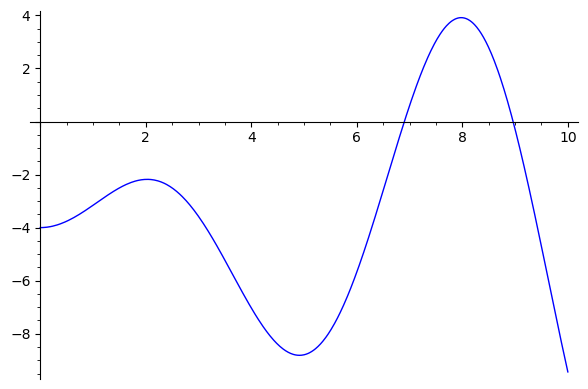

In [26]:
plot(x*sin(x)-4, (x, 0, 10))

We can get it by forcing the search in the interval $[6,8]$:

In [27]:
find_root(eq, 6, 8)

6.901412609021304

In [28]:
find_root(eq, 6, 8, full_output=True)

(6.901412609021304,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 6.901412609021304)

## Approximate solution to a system: `mpmath.findroot`

In [29]:
eq1 = x*sin(x) - y == 0
eq2 = y*cos(y) - x - 1 == 0
for eq in [eq1, eq2]:
    show(eq)

x*sin(x) - y == 0

y*cos(y) - x - 1 == 0

In [30]:
f1(x,y) = eq1.lhs()
f1

(x, y) |--> x*sin(x) - y

In [31]:
f2(x,y) = eq2.lhs()
f2

(x, y) |--> y*cos(y) - x - 1

For solving a system, we use the [mpmath](http://mpmath.org/) toolbox:

In [32]:
import mpmath

In [33]:
f = [lambda a,b: f1(RR(a), RR(b)), lambda a,b: f2(RR(a), RR(b))]
sol = mpmath.findroot(f, (0, 0))
sol

matrix(
[['-0.642871006593746'],
 ['0.385398467857987']])

In [34]:
sol.tolist()

[[mpf('-0.64287100659374617')], [mpf('0.38539846785798665')]]

In [35]:
x1 = RR(sol.tolist()[0][0])
y1 = RR(sol.tolist()[1][0])
x1, y1

(-0.642871006593746, 0.385398467857987)

In [36]:
f1(x1,y1)

-5.55111512312578e-16

In [37]:
f2(x1,y1)

1.11022302462516e-16

In [38]:
sol2 = minimize(eq1.lhs()^2 + eq2.lhs()^2, (-0.6,0.4))
sol2

(-0.6428708247411281, 0.38539856760460756)

In [39]:
x2, y2 = sol2[0], sol2[1]
x2, y2

(-0.6428708247411281, 0.38539856760460756)

In [40]:
f1(x2,y2), f2(x2,y2)

(-3.0233688164127415e-07, -1.0387405890988077e-07)

In [41]:
x1 - x2, y1 - y2

(-1.81852617853195e-7, -9.97466205743258e-8)